# Installing dtws1

In [1]:
!pip uninstall dtws1 -y
!cd .. && make install

Found existing installation: dtws1 0.4.0
Uninstalling dtws1-0.4.0:
  Successfully uninstalled dtws1-0.4.0
rm -fr build/
rm -fr dist/
rm -fr .eggs/
find . -name '*.egg-info' -exec rm -fr {} +
find . -name '*.egg' -exec rm -f {} +
find . -name '*.pyc' -exec rm -f {} +
find . -name '*.pyo' -exec rm -f {} +
find . -name '*~' -exec rm -f {} +
find . -name '__pycache__' -exec rm -fr {} +
rm -fr .tox/
rm -f .coverage
rm -fr htmlcov/
rm -fr .pytest_cache
python setup.py install
running install
running bdist_egg
running egg_info
creating dtws1.egg-info
writing dtws1.egg-info/PKG-INFO
writing dependency_links to dtws1.egg-info/dependency_links.txt
writing requirements to dtws1.egg-info/requires.txt
writing top-level names to dtws1.egg-info/top_level.txt
writing manifest file 'dtws1.egg-info/SOURCES.txt'
reading manifest file 'dtws1.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'dtws1.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/e

Installing easy_install script to /home/chen/work/venv/bin
Installing easy_install-3.8 script to /home/chen/work/venv/bin

Using /home/chen/work/venv/lib/python3.6/site-packages/setuptools-45.1.0-py3.6.egg
Searching for MarkupSafe==1.1.1
Best match: MarkupSafe 1.1.1
Adding MarkupSafe 1.1.1 to easy-install.pth file

Using /home/chen/work/venv/lib/python3.6/site-packages
Searching for decorator==4.4.1
Best match: decorator 4.4.1
Adding decorator 4.4.1 to easy-install.pth file

Using /home/chen/work/venv/lib/python3.6/site-packages
Finished processing dependencies for dtws1==0.4.0


# Importing Dependencies

In [3]:
from dtws1 import heatmap, colorutil
from PIL import Image
from h3 import h3
import numpy as np
import pandas as pd
import tilemapbase

/home/chen/work/venv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/chen/work/venv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/chen/work/venv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful o

# Initializing Database for Tilemapbase

In [4]:
tilemapbase.init(create=True)

# Initializing Sample Dataframe

In [5]:
hills_lat, hills_lng = 35.66687568, 139.74947495
ids = list(h3.k_ring(h3.geo_to_h3(hills_lat, hills_lng, 10), 10))
print(ids[:3])

['8a2f5aadc6d7fff', '8a2f5aadc6c7fff', '8a2f5aade62ffff']


In [6]:
lats = [h3.h3_to_geo(i)[0] for i in ids]
lngs = [h3.h3_to_geo(i)[1] for i in ids]
print(lats[0], lngs[0])

35.658622878708535 139.74656042802187


In [7]:
df = pd.DataFrame(dict(
    id = ids,
    lat = lats,
    lng = lngs
))
df["rand"] = np.random.randint(1,15,size=len(df)) ## Random numbers are here to exhibit different colors of grids
df.head()

id        lat         lng  rand
0  8a2f5aadc6d7fff  35.658623  139.746560    13
1  8a2f5aadc6c7fff  35.657640  139.745831    12
2  8a2f5aade62ffff  35.675674  139.753625     1
3  8a2f5aade8cffff  35.663994  139.758961    13
4  8a2f5aade717fff  35.675412  139.757636     3

# Implementing heatmap.draw

# Saving Multiple Images

0    1
1    0
2    1
3    1
4    0
Name: rand2, dtype: int64
0    1
1    0
2    1
3    1
4    3
Name: rand2, dtype: int64
0    3
1    2
2    1
3    3
4    3
Name: rand2, dtype: int64
0    1
1    0
2    1
3    1
4    3
Name: rand2, dtype: int64
0    6
1    5
2    1
3    6
4    3
Name: rand2, dtype: int64
0    5
1    4
2    1
3    5
4    3
Name: rand2, dtype: int64
0    4
1    3
2    1
3    4
4    3
Name: rand2, dtype: int64
0    3
1    2
2    1
3    3
4    3
Name: rand2, dtype: int64
0    2
1    1
2    1
3    2
4    3
Name: rand2, dtype: int64
0    1
1    0
2    1
3    1
4    3
Name: rand2, dtype: int64
0     0
1    12
2     1
3     0
4     3
Name: rand2, dtype: int64
0    13
1    12
2     1
3    13
4     3
Name: rand2, dtype: int64


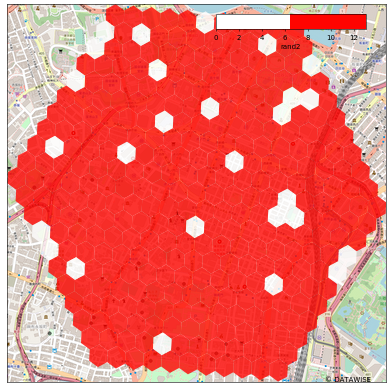

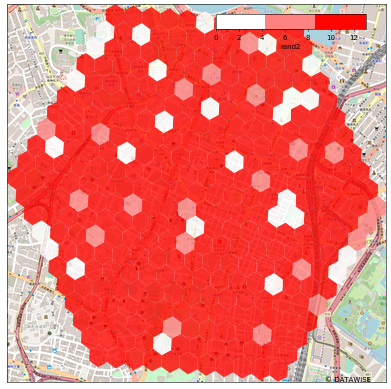

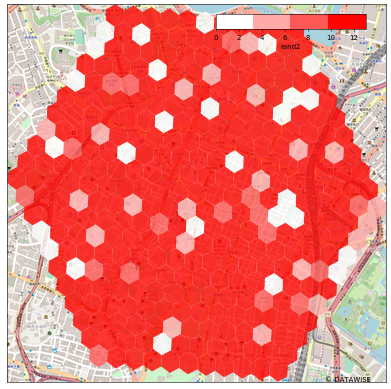

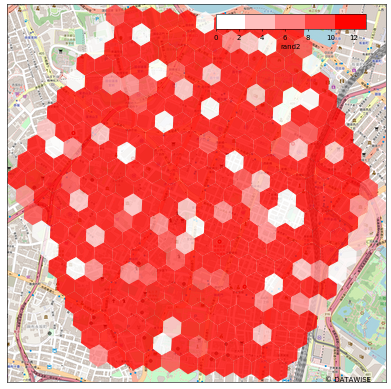

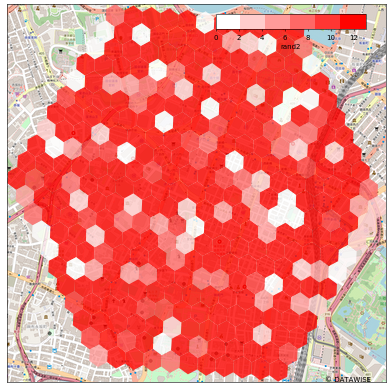

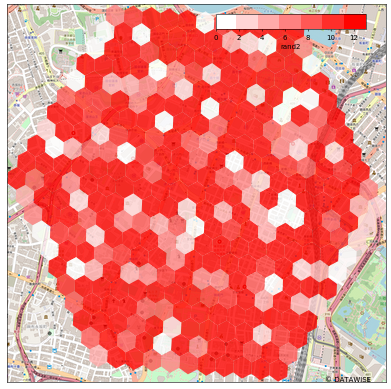

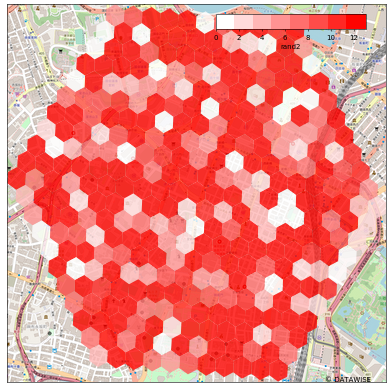

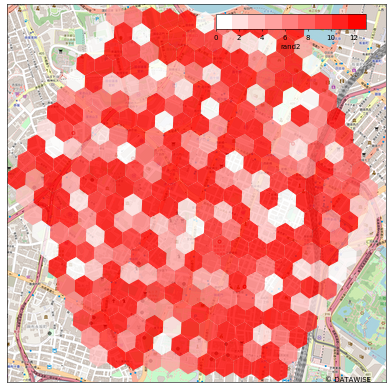

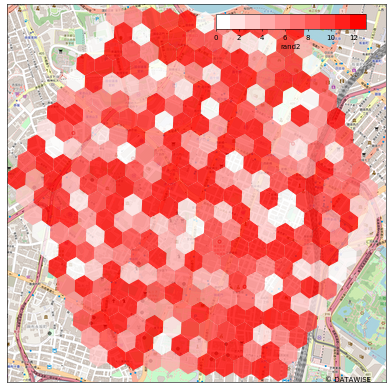

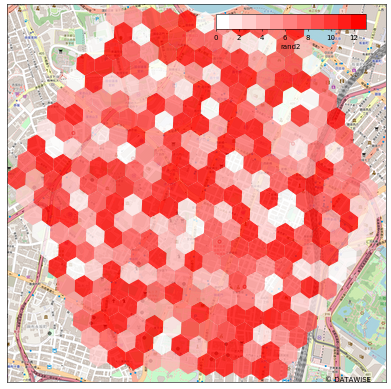

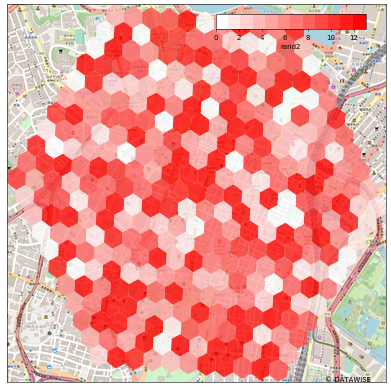

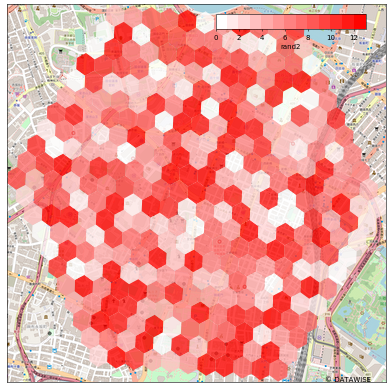

In [8]:
dfs = []
for i in range(3,15):
    df["rand2"] = df["rand"] % i
    tmp_df = df
    print(tmp_df.rand2.head())
    dfs.append(dict(    
    df=tmp_df, 
    id_col="id",
    val_col="rand2", 
    extent=heatmap.extent(tmp_df["id"]),
    color_selector=colorutil.color_selector(values=tmp_df.rand2, n=max(tmp_df.rand2)) ,
    figsize=(10,10),
    width=1000,
    dpi=50))
for i in dfs:
    heatmap.draw(**i)

# Draw Gif from Images

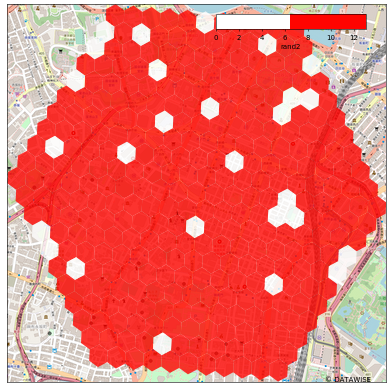

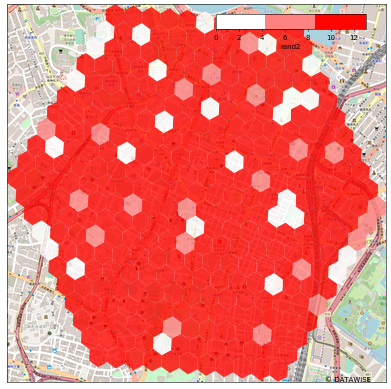

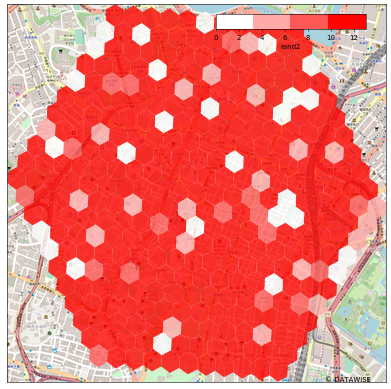

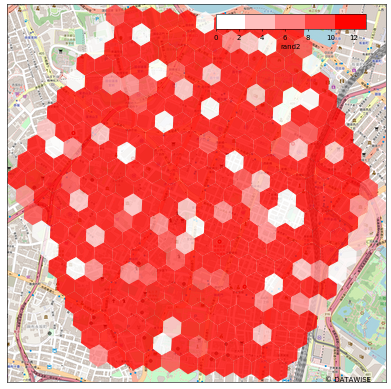

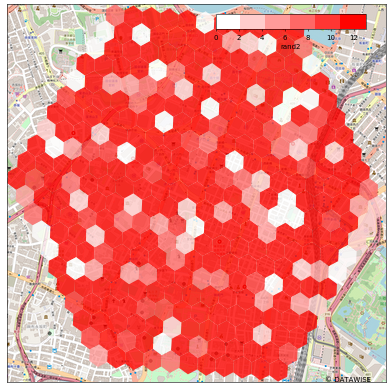

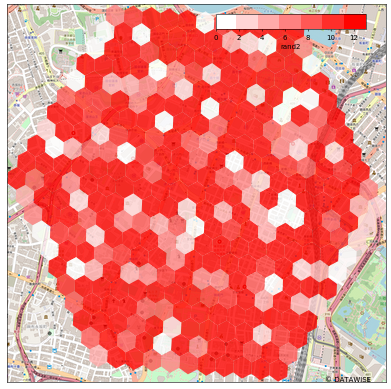

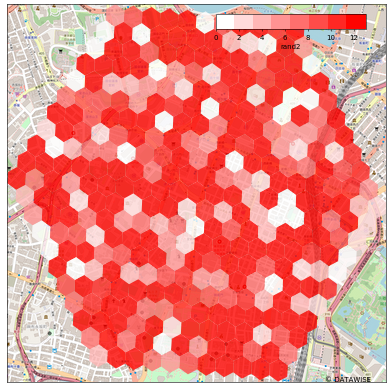

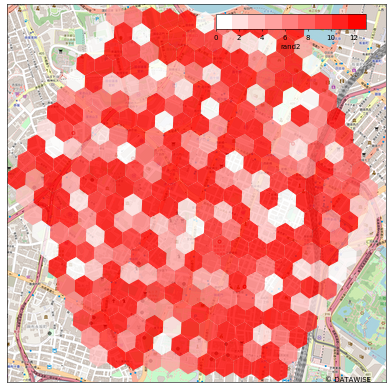

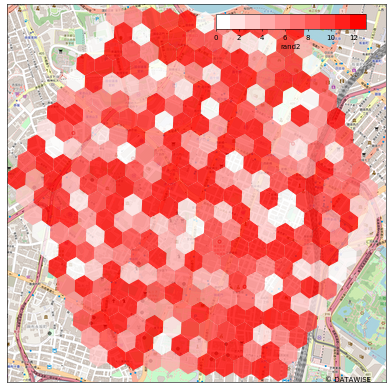

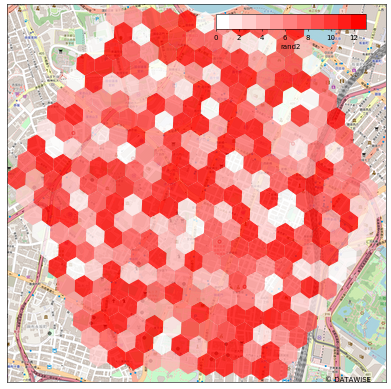

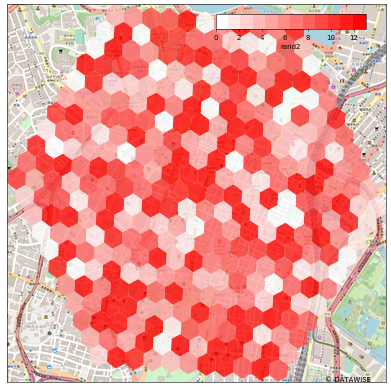

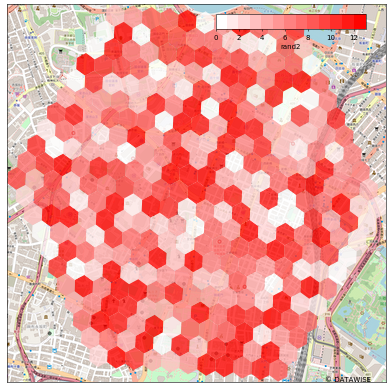

In [9]:

heatmap.draw_gif_from_images(heatmap.draw, dfs, 'images/draw.gif', duration=80, loop=0)


In [10]:
from IPython.display import Image #Jupyter doesn't show GIFs natively
Image(url='images/draw.gif') 